# Regresja liniowa

Regresja liniowa to pierwszy i najbardziej podstawowy "model", który 
pewnie część z Was zna ze studiów. 

Mamy zmienną zależną (np. cena nieruchomości) i zmienną objaśniającą 
(np. wielkość nieruchomości w metrach kw). Na podstawie danych historycznych 
chcielibyśmy odkryć zależność między tymi zmiennymi. 

W przypadku regresji liniowej zakładamy, że zależność między 
nimi jest liniowa. Co możemy spróbować stwierdzić naocznie np. rysując wykresy z danych historycznych

Korzystamy ze zbioru cen mieszkań znanego z 02_data_exploration

**Zadanie: przewidzieć cenę mieszkań na podstawie danych**

In [1]:
import pandas as pd
import sklearn.model_selection
import sklearn.linear_model
import sklearn.metrics
import seaborn as sns
import math
%matplotlib inline  

In [2]:
r = pd.read_csv('ceny_mieszkan_w_poznaniu.tsv', sep = '\t')

# podział na zbiór trenujący/testowy
r_train, r_test = sklearn.model_selection.train_test_split(r, test_size = 0.1) 

Zakładamy w naszym przypadku, że cena będzie funkcją liniową (afiniczną) ilości metrów kwadratowych mieszkania. Jest to założenie logiczne- nim więcej metrów, tym większej ceny się spodziewamy.

Jeżeli zależność jest liniowa powinniśmy być w stanie narysować prostą przebiegającą możliwie blisko wszystkich naszych obserwacji.

/Users/lukasz.knade/anaconda3/envs/html/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


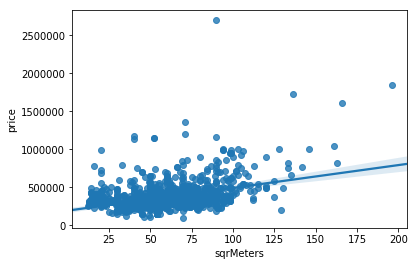

In [3]:
sns.regplot(r_train.sqrMeters, r_train.price) # rzeczywiście - im więcej metrów kw. tym większa cena

Zależność której szukamy możemy zapisać w postaci prostej funkcji $h= ax + b$, gdzie:
* $h$- prognozowana przez nas cena mieszkania,
* $x$- ilość metrów,
* $a$- nieznany parametr
* $b$- nieznany parametr

Pozostaje tylko odnaleźć brakujące wartości $a$ i $b$ na podstawie danych historycznych. **Skąd bedziemy wiedzieli że znaleźliśmy właściwe wartości?**

### Jak ocenić jakość naszego modelu?

Najlepiej, żeby punkty (rzeczywiste, historyczne wartości) leżały na naszej prostej albo jak najlbliżej. Dla konkretnego $x$ kwadrat odległość rzeczywistej ceny $y$ od prognozowanej przez nas wartości ceny $h$ będziemy wynosi: : $$(y - h)^2$$ (kwadrat nakłada duże kary na większy dystans).


Uśredniając po wszystkich punktach i biorąc pierwiastek z sumy:

$$ RMSE = \sqrt{\, \frac{1}{m} \sum_{i = 1}^{m} \left( h^{(i)} - y^{(i)} \right) ^2 }$$


Graficznie można to przedstawić tak:

![](ml_introduction_pictures/residual.png)


### Znalezienie parametrów

**Jak znaleźć prostą która najlepiej wpasowuje się w nasze dane?**

Nasz model to funkcja liniowa $y = ax + b$ to czego nie wiemy to wartości parametrów $a$ i $b$ dla których RMSE będzie miało najmniejszą wartość.

Czyli chcemy znaleźć takie $a$ i $b$, żeby
$$ RMSE = \sqrt{\, \frac{1}{m} \sum_{i = 1}^{m} \left( h^{(i)} - y^{(i)} \right) ^2 } = \sqrt{\, \frac{1}{m} \sum_{i = 1}^{m} \left( ax - b - y^{(i)} \right) ^2 } $$ było najmniejsze.

Szukamy więc minimum funkcji RMSE (dla zmiennych $a$ i $b$). Implementacja może bazować na odwracaniu macierzy (bardzo kosztowne obliczeniowo) albo na metodach iteracyjnych - metody gradientu prostego, które są szybkie, ale nie zawsze dają optymalne rozwiazanie.

### Praktyka w sklearn

W prakyce parametry $a$ i $b$ znajdowane są automatycznie przez bibliotekę. Łatwo znaleźć RMSE (chcemy jak najmniejsze) i zilustrować algorytm dla różnie wybranych zmiennych niezależnych.

Szukajac właściwego modelu często patrzymy na różnego rodzaju baseline'y. W tym przypadku naturalnym estymatorem dla ceny mieszkania może być średnia cena wyliczona na podstawie całeo zbioru testowego. *Jakie RMSE ma taki "model"?*

In [4]:
import math
from sklearn.metrics import mean_squared_error

baseline_RMSE = math.sqrt(mean_squared_error([r_train.price.mean()]*len(r_test), r_test.price))
print('Baseline test RMSE: ', baseline_RMSE)

Baseline test RMSE:  132421.586564792


In [5]:
def evaluate_regression(column_name):
     # narysujmy wykres danej cechy w funkcji ceny
    sns.regplot(r_train[column_name], r_train.price)

    # jakie RMSE uzyskamy dla tej cechy?
    m1 = sklearn.linear_model.LinearRegression()
    
    # w ten sposób podajemy kolumny jako listę wartości do naszego modelu
    # niestety nie akceptuje on pd.Series więc konwertujemy ją do listy
    X_train = r_train[column_name].values.reshape(-1, 1)
    y_train = r_train.price.values.reshape(-1, 1)
    
    # właściwe trenowanie modelu
    m1.fit(X_train,y_train)
    
    # otrzymane wartości współczynników kierunkowych
    print('a =',m1.coef_)
    print('b =',m1.intercept_)
    
    # obliczanie RMSE dla zbioru testowego i trenującego
    h_train = m1.predict(X_train)
    X_test = r_test[column_name].values.reshape(-1, 1)
    y_test = r_test.price.values.reshape(-1, 1)
    h_test = m1.predict(X_test)
    print('train RMSE = ',math.sqrt(sklearn.metrics.mean_squared_error(h_train,y_train)))
    print('test RMSE = ',math.sqrt(sklearn.metrics.mean_squared_error(h_test,y_test)))
    print('baseline RMSE = ', baseline_RMSE)
    return m1

a = [[2995.31672446]]
b = [195404.1026862]
train RMSE =  152151.6481584998
test RMSE =  112114.4717696176
baseline RMSE =  132421.586564792


/Users/lukasz.knade/anaconda3/envs/html/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

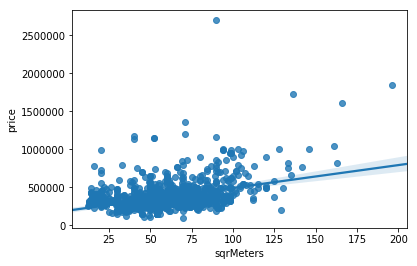

In [6]:
evaluate_regression('sqrMeters') # wygląda przyzwoicie, nasza intuicja znalazła potwierdzenie ;-)

a = [[-3618.65691543]]
b = [378911.19689417]
train RMSE =  166041.8595446293
test RMSE =  139177.83751899822
baseline RMSE =  140017.58836228


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

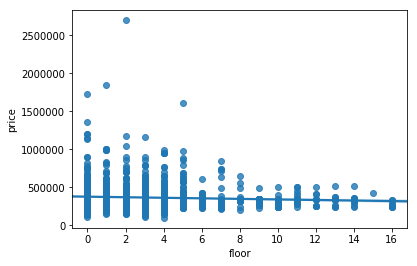

In [29]:
evaluate_regression('floor') # tu RMSE jest większy, więc gorszy wynik

a = [[108016.05696833]]
b = [77148.62183233]
train RMSE =  143813.90615821714
test RMSE =  114205.87508999096
baseline RMSE =  140017.58836228


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

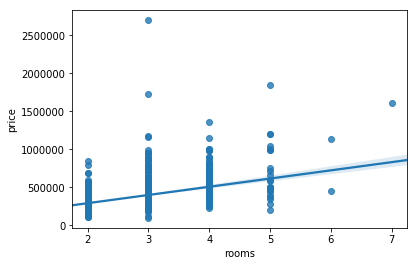

In [30]:
evaluate_regression('rooms') # ilość pokoi ma większy wpływ - RMSE jest mniejsze

a = [[12148.75852539]]
b = [359177.85234848]
train RMSE =  166302.48065583926
test RMSE =  139771.38189432852
baseline RMSE =  140017.58836228


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

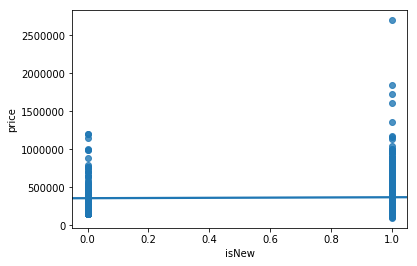

In [31]:
# jak widać można używać cechy jakościowej binarnej
evaluate_regression('isNew')
# tutaj wynik jest kiepski

# Ex. 1

Jaką cene będzie miało według modelu opartego o liczbę pokoi mieszkanie, które ma 7 pokoi?

In [7]:
# ?
regr = sklearn.linear_model.LinearRegression()
X_train = r_train['rooms'].values.reshape(-1, 1)
y_train = r_train.price.values.reshape(-1, 1)
regr.fit(X_train,y_train)

print(regr.predict([[7]]))

[[848173.18497544]]


### Jakich cech możemy używać?

**Zmienne ilościowe ciągłe (np. metry kw, długość) i dyskretne (np. liczba pokoi, liczba dzieci)** sa ok. Dla **zmiennej ilościowej porządkowej (np. wykształcenie, ocena w szkole, godzina wystapienia zdarzenia)** model będzie dawał jakiś wynik (choć niekoniecznie formalnie poprawne jest jego użycie, gdyż założenie liniowości nie będzie spełnione).


**Zmienne jakościowe binarne** sa ok (jak widać wyżej)


**Zmiennych jakościowe o więcej niz 2 klasach** nie wrzucamy do modelu tak po prostu (a nawet jeżeli byśmy chcieli, to w jakiej kolejnosci np. zmapować religie na integery i jaką dostaniemy informację z modelu?)


Zmienne jakościowe możemy:
* usunać z modelu
* stworzyć tyle modeli ile jest kombinacji zmiennych jakościowych
* użyć one hot encoding (o tym później)

### Jakie wybrać cechy

Oczywiście takie, które dają najmniejszy RMSE. Najlepsze będą cechy skorelowane liniwo:

In [32]:
r.corr() 

,price,isNew,rooms,floor,sqrMetres
price,1.000000,0.034873,0.508833,-0.068882,0.422073
isNew,0.034873,1.000000,0.008730,-0.062179,0.083835
rooms,0.508833,0.008730,1.000000,-0.078585,0.377587
floor,-0.068882,-0.062179,-0.078585,1.000000,-0.055053
sqrMetres,0.422073,0.083835,0.377587,-0.055053,1.000000


Jak widać **sqrMeters** ma wysoką korelację, a **liczba pokoi** jeszcze wyższą

### Regresja wielu zmiennych

Oczywiście regresja nie musi być funkcją jednej zmiennej. Może być także funkcją wielu zmiennych (np. ilości metrów kwadratowych oraz ilości pokoi. Model wygląda wtedy: $$h = a_1 * x_1 + a_2 * x_2  + b$$ i szukamy wtedy $a_1$, $a_2$, $b$.


Dostaniemy wtedy lepszy wynik na zbiorze trenującym. Lepiej jednak nie używać nieskorelowanych liniowo cech, gdyż na zbiorze testowym raczej nie będą dawać lepszych wyników oraz komplikują model.

Sprawdźmy jak będzie wyglądał model 2 zmiennych (tracimy możliwość łatwej wizualizacji):

In [10]:
features = ['sqrMeters', 'rooms']
label = ['price']

m1 = sklearn.linear_model.LinearRegression()
X_train = r_train[features]
y_train = r_train[label].values.reshape(-1, 1)

X_test = r_test[features]
y_test = r_test[label].values.reshape(-1, 1)
m1.fit(X_train,y_train)

h_train = m1.predict(X_train)
h_test = m1.predict(X_test)
print('a1, a2  =',m1.coef_[0])
print('b=',m1.intercept_)

h_train = m1.predict(X_train)
print('RMSE train: ',math.sqrt(sklearn.metrics.mean_squared_error(h_train,y_train)))
print('RMSE test: ',math.sqrt(sklearn.metrics.mean_squared_error(h_test,y_test)))
print('baseline RMSE: ', baseline_RMSE)

a1, a2  = [ 1868.40330748 90029.72845023]
b= [19275.18830121]
RMSE train:  137989.4738804815
RMSE test:  106543.20116320888
baseline RMSE:  132421.586564792


Jak widać RMSE jest jeszcze mniejsze.

**Regresja liniowa jest bardzo czuła na obserwacje odstające.** w przypadku tego typu narzedzi jest duży sens aby normalizaowac wartosci, które wchodzą do modelu.

Warto też rozważyć eliminacje danych odstających z modelu. Proste modele takie jak regresja liniowa mają ograniczoną pojemność informacyjną aby dobrze działały konieczny może być spory wysiłek jeżeli chodzi o przygotowanie danych wejściowych. 

Jedną z technik, które można zastosować jest **normalizacja cech**.

In [11]:
# kod normalizujący
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()
r_scaled = min_max_scaler.fit_transform(r[features]) # r_scaled to tablica
r_normalized = pd.DataFrame(r_scaled) #tworzymy df'a
r_normalized.columns = features
r_normalized["price"] = r['price']
r_normalized.head()

/Users/lukasz.knade/anaconda3/envs/html/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


,sqrMeters,rooms,price
0,0.358696,0.2,476118.0
1,0.271739,0.2,459531.0
2,0.016304,0.2,411557.0
3,0.010870,0.4,496416.0
4,0.016304,0.2,406032.0


**Ex. 2**
Czy normalizacja ma pozytywny wpływ na skuteczność działania modelu w tym przypadku? 

In [45]:
# TBD

### Cechy regresji liniowej

#### Zakłada liniowość zmiennej zależnej względem zmiennej/zmiennych niezależnych
Nie zawsze jest to założenie zgodne z rzeczywistością (np. na drugim rysunku widać korelację kwadratową, a nie liniową:

![przed skalowaniem](ml_introduction_pictures/anscombe.png)

Oczywiście jako modelu możemy użyć także funkcji kwadratowej, logarytmicznej, dowolnego wielomianu wielu zmiennych (zależy od danych)


#### Ze zmiennymi jakościowymi musimy się trochę pomęczyć (uwaga wyżej)

#### Regresja jest podstawą działania sieci neuronowych (sieć neuronowa tak naprawdę składa się z wielu regresji)


#### Nie musimy minimaliować akurat RMSE
Może to być tez po np. odległość absolutna: $$ \frac{1}{m} \sum_{i = 1}^{m} \| \left( h^{(i)} - y^{(i)} \right) \|$$

#### ZADANIE: Zrób wszystkie ćwiczenia z tego arkusza ze zbiorem ceny_aut_w_polsce.tsv, w szczególnosci:

* znajdź cechę która daje najlepszy wynik, wylicz dla niej RMSE i narysuj wykres
* to samo z 2 cechami
* to samo ze wszystkimi cechami

**Ten zbiór jest o wiele większy, więc wyniki będą bardziej stabilne**

In [47]:
# To jest dobry zbiór na projekt na koniec dnia